In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
import random
import math
import goto
from goto import with_goto

In [2]:
# GRID FORMATION
def grid_formation():
    grid = []
    max_limit_l = 500
    max_limit_b = 500
    limit = 10
    for i in range(limit,max_limit_l,limit):
        for j in range(limit,max_limit_l,limit):
            arr = [i,j]
            grid.append(arr)
    x = []
    y = []
    for i in range(len(grid)):
        x.append(grid[i][0])
        y.append(grid[i][1])
    return grid,x,y

In [3]:
grid_1,x_1,y_1 = grid_formation()
grid,x,y = grid_formation()

In [4]:
# UNIFORM AND RANDOM PLACEMENT OF TARGETS
def target_placement(n_targets, grid):
    index = []
    target_location = []
    for i in range(0, n_targets):
        n = random.randint(1, len(grid))
        index.append(n)
    for j in index:
        target_location.append(grid[j])
        x_t = []
        y_t = []
        for k in range(len(target_location)):
            x_t.append(target_location[k][0])
            y_t.append(target_location[k][1])
    return target_location,x_t,y_t

In [5]:
target_location_final, x_t, y_t = target_placement(17, grid)

def vicinity(targets):
    grid_2 = []
    for k in range(len(targets)):
        for j in range(1, 26):
            for i in range(1, 26):
                grid_2.append([targets[k][0] + i,targets[k][1] + j])
                grid_2.append([targets[k][0] - i,targets[k][1] + j])
                grid_2.append([targets[k][0] + i,targets[k][1] - j])
                grid_2.append([targets[k][0] - i,targets[k][1] - j])
    return grid_2

grid_2 = vicinity(target_location_final)

In [6]:
def remove_element(v1,v2):
    index_of_target = []
    for i in range(len(v2)):
        for j in range(len(v1)):
            if (v2[i] == v1[j]):
                index_of_target.append(j)
    for ele in sorted(index_of_target, reverse = True): 
        del v1[ele]
    return v1

In [7]:
sensor_locations = remove_element(grid, target_location_final)

In [8]:
x_v = []
y_v = []
for k in range(len(grid_2)):
    x_v.append(grid_2[k][0])
    y_v.append(grid_2[k][1])

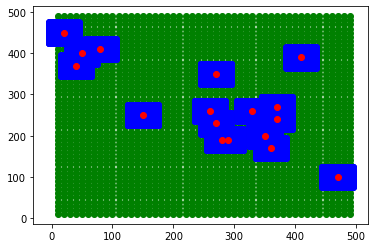

In [9]:
plt.scatter(x, y, c = 'g')
plt.scatter(x_v, y_v, c = 'b')
plt.scatter(x_t, y_t, c = 'r')

In [10]:
def euclidean_dist(p1,p2):
    e_dist = sum([(x - t) ** 2 for x,t in zip(p1,p2)])
    e_dist = math.sqrt(e_dist)
    return e_dist

def power_vector(target, sensor, rk):
    pv = []
    for i in range(len(target)):
        temp = []
        for j in range(len(sensor)):
            if (euclidean_dist(sensor[j], target[i]) < rk):
                temp.append(1)
            else:
                temp.append(0)
        pv.append(temp)
    return pv

In [11]:
def objective_function(power_vector):a
    cost = 150
    cost_arr = []
    for j in range(len(power_vector)):
        cost_arr.append(sum([cost * i for i in power_vector[j]]))
    return (sum(cost_arr))

In [12]:
best = len(sensor_locations)
best_eval = objective_function(power_vector(target_location_final, sensor_locations, 120))
print(f"Initial cost with all sensors: {best_eval}")

curr, curr_eval = best, best_eval
    
removed_sensor_list = []

checker = True
times = 0
for i in range(1000):
    while checker:
        random_item = random.choice(sensor_locations)
        removed_sensor_list.append(random_item)

        my_list = remove_element(sensor_locations, removed_sensor_list)
        print(f"Number of sensors: {len(my_list)}")
        power_vector_stored = power_vector(target_location_final, my_list, 120)
        counter = 0
        for k in range(len(power_vector_stored)):
            if sum(power_vector_stored[k]) > 1:
                counter += 0
            else:
                counter += 1

        if counter > 0:
            for k in range(1500):
                my_list = random.sample(grid_2, len(my_list))
                power_vec_new = power_vector(target_location_final, my_list, 120)
                c = 0
                for k in range(len(power_vec_new)):
                    if sum(power_vec_new[k]) > 0:
                        c += 0
                    else:
                        c += 1
            if c > 0:
                if (times < 2):
                    checker = True
                    times += 1
                else:
                    checker = False
                    print("optimization reached")
                    

        elif counter == 0:
            new = len(my_list)
            new_eval = objective_function(power_vector(target_location_final, my_list, 120))
            print(f"New cost: {new_eval}")

Initial cost with all sensors: 973050
Number of sensors: 2383
New cost: 972450
Number of sensors: 2382
New cost: 971850
Number of sensors: 2381
New cost: 970650
Number of sensors: 2380
New cost: 969600
Number of sensors: 2379
New cost: 969450
Number of sensors: 2378
New cost: 969450
Number of sensors: 2377
New cost: 969000
Number of sensors: 2376
New cost: 968850
Number of sensors: 2375
New cost: 968850
Number of sensors: 2374
New cost: 968250
Number of sensors: 2373
New cost: 966900
Number of sensors: 2372
New cost: 966300
Number of sensors: 2371
New cost: 966300
Number of sensors: 2370
New cost: 966150
Number of sensors: 2369
New cost: 965400
Number of sensors: 2368
New cost: 965400
Number of sensors: 2367
New cost: 965250
Number of sensors: 2366
New cost: 965100
Number of sensors: 2365
New cost: 965100
Number of sensors: 2364
New cost: 965100
Number of sensors: 2363
New cost: 964500
Number of sensors: 2362
New cost: 964350
Number of sensors: 2361
New cost: 964200
Number of sensors: 

New cost: 891150
Number of sensors: 2182
New cost: 891000
Number of sensors: 2181
New cost: 890850
Number of sensors: 2180
New cost: 890850
Number of sensors: 2179
New cost: 889950
Number of sensors: 2178
New cost: 888750
Number of sensors: 2177
New cost: 888750
Number of sensors: 2176
New cost: 888450
Number of sensors: 2175
New cost: 888150
Number of sensors: 2174
New cost: 887850
Number of sensors: 2173
New cost: 887700
Number of sensors: 2172
New cost: 887700
Number of sensors: 2171
New cost: 887100
Number of sensors: 2170
New cost: 887100
Number of sensors: 2169
New cost: 886350
Number of sensors: 2168
New cost: 886200
Number of sensors: 2167
New cost: 885900
Number of sensors: 2166
New cost: 885900
Number of sensors: 2165
New cost: 885600
Number of sensors: 2164
New cost: 885600
Number of sensors: 2163
New cost: 885450
Number of sensors: 2162
New cost: 884850
Number of sensors: 2161
New cost: 883800
Number of sensors: 2160
New cost: 883200
Number of sensors: 2159
New cost: 883050

New cost: 804150
Number of sensors: 1981
New cost: 803550
Number of sensors: 1980
New cost: 802950
Number of sensors: 1979
New cost: 802800
Number of sensors: 1978
New cost: 802500
Number of sensors: 1977
New cost: 802200
Number of sensors: 1976
New cost: 802200
Number of sensors: 1975
New cost: 802200
Number of sensors: 1974
New cost: 802050
Number of sensors: 1973
New cost: 801900
Number of sensors: 1972
New cost: 801900
Number of sensors: 1971
New cost: 801750
Number of sensors: 1970
New cost: 800550
Number of sensors: 1969
New cost: 800400
Number of sensors: 1968
New cost: 799800
Number of sensors: 1967
New cost: 799800
Number of sensors: 1966
New cost: 799650
Number of sensors: 1965
New cost: 799200
Number of sensors: 1964
New cost: 798900
Number of sensors: 1963
New cost: 798300
Number of sensors: 1962
New cost: 798150
Number of sensors: 1961
New cost: 798000
Number of sensors: 1960
New cost: 797400
Number of sensors: 1959
New cost: 797100
Number of sensors: 1958
New cost: 796350

New cost: 732000
Number of sensors: 1780
New cost: 732000
Number of sensors: 1779
New cost: 731400
Number of sensors: 1778
New cost: 730950
Number of sensors: 1777
New cost: 730950
Number of sensors: 1776
New cost: 730200
Number of sensors: 1775
New cost: 729600
Number of sensors: 1774
New cost: 729000
Number of sensors: 1773
New cost: 728850
Number of sensors: 1772
New cost: 728400
Number of sensors: 1771
New cost: 727800
Number of sensors: 1770
New cost: 727650
Number of sensors: 1769
New cost: 727350
Number of sensors: 1768
New cost: 726900
Number of sensors: 1767
New cost: 726450
Number of sensors: 1766
New cost: 726150
Number of sensors: 1765
New cost: 725400
Number of sensors: 1764
New cost: 724800
Number of sensors: 1763
New cost: 724200
Number of sensors: 1762
New cost: 724200
Number of sensors: 1761
New cost: 722850
Number of sensors: 1760
New cost: 722700
Number of sensors: 1759
New cost: 722400
Number of sensors: 1758
New cost: 721650
Number of sensors: 1757
New cost: 721650

Number of sensors: 1580
New cost: 645150
Number of sensors: 1579
New cost: 645150
Number of sensors: 1578
New cost: 644850
Number of sensors: 1577
New cost: 644850
Number of sensors: 1576
New cost: 643800
Number of sensors: 1575
New cost: 643050
Number of sensors: 1574
New cost: 642900
Number of sensors: 1573
New cost: 642750
Number of sensors: 1572
New cost: 641850
Number of sensors: 1571
New cost: 640950
Number of sensors: 1570
New cost: 640200
Number of sensors: 1569
New cost: 640200
Number of sensors: 1568
New cost: 640200
Number of sensors: 1567
New cost: 640200
Number of sensors: 1566
New cost: 639600
Number of sensors: 1565
New cost: 639000
Number of sensors: 1564
New cost: 637800
Number of sensors: 1563
New cost: 637650
Number of sensors: 1562
New cost: 637650
Number of sensors: 1561
New cost: 637500
Number of sensors: 1560
New cost: 637500
Number of sensors: 1559
New cost: 636600
Number of sensors: 1558
New cost: 636450
Number of sensors: 1557
New cost: 635850
Number of sensor

Number of sensors: 1380
New cost: 557400
Number of sensors: 1379
New cost: 556650
Number of sensors: 1378
New cost: 556500
Number of sensors: 1377
New cost: 555750
Number of sensors: 1376
New cost: 554850
Number of sensors: 1375
New cost: 554100
Number of sensors: 1374
New cost: 553950
Number of sensors: 1373
New cost: 553650
Number of sensors: 1372
New cost: 553650
Number of sensors: 1371
New cost: 553050
Number of sensors: 1370
New cost: 552750
Number of sensors: 1369
New cost: 552600
Number of sensors: 1368
New cost: 552000
Number of sensors: 1367
New cost: 551850
Number of sensors: 1366
New cost: 551700
Number of sensors: 1365
New cost: 551400
Number of sensors: 1364
New cost: 550800
Number of sensors: 1363
New cost: 549600
Number of sensors: 1362
New cost: 549450
Number of sensors: 1361
New cost: 548100
Number of sensors: 1360
New cost: 547950
Number of sensors: 1359
New cost: 547500
Number of sensors: 1358
New cost: 547500
Number of sensors: 1357
New cost: 547350
Number of sensor

Number of sensors: 1180
New cost: 467550
Number of sensors: 1179
New cost: 467400
Number of sensors: 1178
New cost: 466950
Number of sensors: 1177
New cost: 465750
Number of sensors: 1176
New cost: 465750
Number of sensors: 1175
New cost: 465600
Number of sensors: 1174
New cost: 465150
Number of sensors: 1173
New cost: 465150
Number of sensors: 1172
New cost: 464850
Number of sensors: 1171
New cost: 464550
Number of sensors: 1170
New cost: 464400
Number of sensors: 1169
New cost: 464250
Number of sensors: 1168
New cost: 463800
Number of sensors: 1167
New cost: 463200
Number of sensors: 1166
New cost: 463200
Number of sensors: 1165
New cost: 463200
Number of sensors: 1164
New cost: 462450
Number of sensors: 1163
New cost: 461850
Number of sensors: 1162
New cost: 460350
Number of sensors: 1161
New cost: 460350
Number of sensors: 1160
New cost: 460350
Number of sensors: 1159
New cost: 459600
Number of sensors: 1158
New cost: 459000
Number of sensors: 1157
New cost: 458850
Number of sensor

Number of sensors: 978
New cost: 384900
Number of sensors: 977
New cost: 384750
Number of sensors: 976
New cost: 384150
Number of sensors: 975
New cost: 384000
Number of sensors: 974
New cost: 383700
Number of sensors: 973
New cost: 383700
Number of sensors: 972
New cost: 383700
Number of sensors: 971
New cost: 383700
Number of sensors: 970
New cost: 383250
Number of sensors: 969
New cost: 382050
Number of sensors: 968
New cost: 381450
Number of sensors: 967
New cost: 381300
Number of sensors: 966
New cost: 380700
Number of sensors: 965
New cost: 380400
Number of sensors: 964
New cost: 379950
Number of sensors: 963
New cost: 379350
Number of sensors: 962
New cost: 378750
Number of sensors: 961
New cost: 378150
Number of sensors: 960
New cost: 377400
Number of sensors: 959
New cost: 377250
Number of sensors: 958
New cost: 377250
Number of sensors: 957
New cost: 376050
Number of sensors: 956
New cost: 375750
Number of sensors: 955
New cost: 375600
Number of sensors: 954
New cost: 375450


Number of sensors: 773
New cost: 303000
Number of sensors: 772
New cost: 302550
Number of sensors: 771
New cost: 302550
Number of sensors: 770
New cost: 301200
Number of sensors: 769
New cost: 301200
Number of sensors: 768
New cost: 301050
Number of sensors: 767
New cost: 300900
Number of sensors: 766
New cost: 300150
Number of sensors: 765
New cost: 300000
Number of sensors: 764
New cost: 299400
Number of sensors: 763
New cost: 299400
Number of sensors: 762
New cost: 299100
Number of sensors: 761
New cost: 298650
Number of sensors: 760
New cost: 297450
Number of sensors: 759
New cost: 296850
Number of sensors: 758
New cost: 296250
Number of sensors: 757
New cost: 294900
Number of sensors: 756
New cost: 293700
Number of sensors: 755
New cost: 292950
Number of sensors: 754
New cost: 292950
Number of sensors: 753
New cost: 292800
Number of sensors: 752
New cost: 291300
Number of sensors: 751
New cost: 290100
Number of sensors: 750
New cost: 289950
Number of sensors: 749
New cost: 289650


Number of sensors: 566
New cost: 226800
Number of sensors: 565
New cost: 226650
Number of sensors: 564
New cost: 225750
Number of sensors: 563
New cost: 225600
Number of sensors: 562
New cost: 225000
Number of sensors: 561
New cost: 224850
Number of sensors: 560
New cost: 224100
Number of sensors: 559
New cost: 224100
Number of sensors: 558
New cost: 223350
Number of sensors: 557
New cost: 223200
Number of sensors: 556
New cost: 222150
Number of sensors: 555
New cost: 222000
Number of sensors: 554
New cost: 221550
Number of sensors: 553
New cost: 221400
Number of sensors: 552
New cost: 220800
Number of sensors: 551
New cost: 220650
Number of sensors: 550
New cost: 220650
Number of sensors: 549
New cost: 220500
Number of sensors: 548
New cost: 220200
Number of sensors: 547
New cost: 219750
Number of sensors: 546
New cost: 219450
Number of sensors: 545
New cost: 219000
Number of sensors: 544
New cost: 219000
Number of sensors: 543
New cost: 218850
Number of sensors: 542
New cost: 218700


Number of sensors: 359
New cost: 148050
Number of sensors: 358
New cost: 148050
Number of sensors: 357
New cost: 148050
Number of sensors: 356
New cost: 147600
Number of sensors: 355
New cost: 147600
Number of sensors: 354
New cost: 147000
Number of sensors: 353
New cost: 146850
Number of sensors: 352
New cost: 146850
Number of sensors: 351
New cost: 146250
Number of sensors: 350
New cost: 144900
Number of sensors: 349
New cost: 144150
Number of sensors: 348
New cost: 144150
Number of sensors: 347
New cost: 144000
Number of sensors: 346
New cost: 144000
Number of sensors: 345
New cost: 143850
Number of sensors: 344
New cost: 143550
Number of sensors: 343
New cost: 143550
Number of sensors: 342
New cost: 143400
Number of sensors: 341
New cost: 142800
Number of sensors: 340
New cost: 141900
Number of sensors: 339
New cost: 141750
Number of sensors: 338
New cost: 141450
Number of sensors: 337
New cost: 141150
Number of sensors: 336
New cost: 140850
Number of sensors: 335
New cost: 140850


Number of sensors: 152
New cost: 63600
Number of sensors: 151
New cost: 63600
Number of sensors: 150
New cost: 63000
Number of sensors: 149
New cost: 62400
Number of sensors: 148
New cost: 62100
Number of sensors: 147
New cost: 62100
Number of sensors: 146
New cost: 61800
Number of sensors: 145
New cost: 61200
Number of sensors: 144
New cost: 61200
Number of sensors: 143
New cost: 61200
Number of sensors: 142
New cost: 59850
Number of sensors: 141
New cost: 59850
Number of sensors: 140
New cost: 58350
Number of sensors: 139
New cost: 57450
Number of sensors: 138
New cost: 56850
Number of sensors: 137
New cost: 56850
Number of sensors: 136
New cost: 56700
Number of sensors: 135
New cost: 56550
Number of sensors: 134
New cost: 56100
Number of sensors: 133
New cost: 55950
Number of sensors: 132
New cost: 55500
Number of sensors: 131
New cost: 55200
Number of sensors: 130
New cost: 55050
Number of sensors: 129
New cost: 54600
Number of sensors: 128
New cost: 54300
Number of sensors: 127
Ne

In [13]:
my_list[1][0]

94

In [14]:
new_eval

11100

In [15]:
useless_sensors = []
count = 0
for k in range(len(my_list)):
    for j in range(len(target_location_final)):
        if (euclidean_dist(target_location_final[j],my_list[k]) > 100):
            count += 1
        else:
            count += 0
    if (count == len(target_location_final)):
        useless_sensors.append(my_list[k])

In [16]:
power_vector(target_location_final, my_list, 60)

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0,

In [17]:
x_f = []
y_f = []
for k in range(len(my_list)):
    x_f.append(my_list[k][0])
    y_f.append(my_list[k][1])

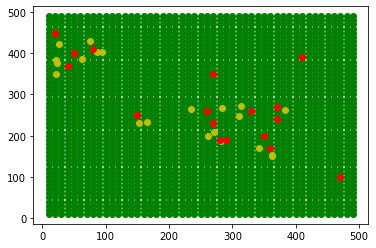

In [18]:
plt.scatter(x, y, c = 'g')
plt.scatter(x_f, y_f, c = 'y')
plt.scatter(x_t, y_t, c = 'r')

In [19]:
# best = len(sensor_locations)
# best_eval = objective_function(power_vector(target_location_final, sensor_locations, 5))
# print(f"Initial cost with all sensors: {best_eval}")

# curr, curr_eval = best, best_eval
    
# removed_sensor_list = []

# checker = True

# for i in range(1000):
#     while checker:
#         random_item = random.choice(sensor_locations)
#         removed_sensor_list.append(random_item)

#         my_list = remove_element(sensor_locations, removed_sensor_list)
#         print(len(my_list))
#         power_vector_stored = power_vector(target_location_final, my_list, 5)
#         counter = 0
#         for k in range(len(power_vector_stored)):
#             if sum(power_vector_stored[k]) > 1:
#                 counter += 0
#             else:
#                 counter += 1

#         if counter > 0:
#             for k in range(500):
#                 my_list = random.sample(grid_1, len(my_list))
#                 power_vec_new = power_vector(target_location_final, my_list, 5)
#                 c = 0
#                 for k in range(len(power_vec_new)):
#                     if sum(power_vec_new[k]) > 0:
#                         c += 0
#                     else:
#                         c += 1
#             if c > 0:
#                 checker = False
#                 print("optimization reached")

#         elif counter == 0:
#             new = len(my_list)
#             new_eval = objective_function(power_vector(target_location_final, my_list, 5))
#             print(new_eval)